In [0]:
import numpy as np
from skimage import io, segmentation, color
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

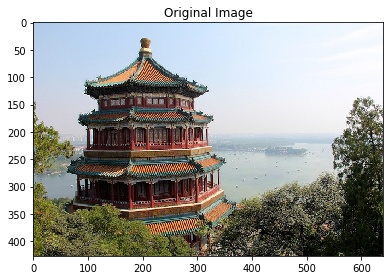

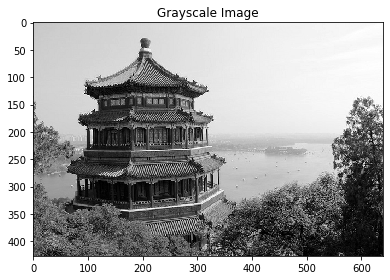

In [147]:
img = load_sample_image('china.jpg')
img_gray = color.rgb2gray(img)
plt.figure(1)
plt.title('Original Image')
io.imshow(img)
plt.figure(2)
plt.title('Grayscale Image')
io.imshow(img_gray)

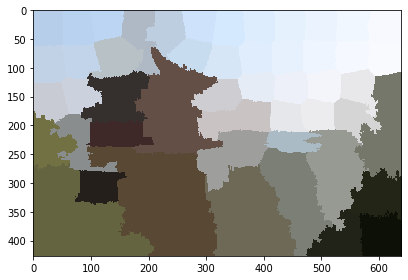

In [148]:
# Superpixel Method
img_seg = segmentation.slic(img, n_segments=100, compactness=10.0)
superpixel = color.label2rgb(img_seg, img, kind='avg')
io.imshow(superpixel)

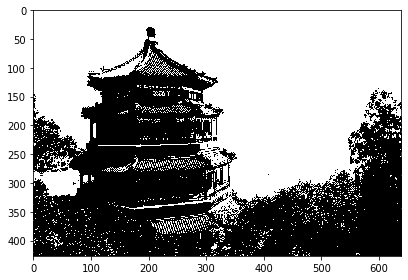

In [151]:
# Otsu's Method
val = threshold_otsu(img_gray)
io.imshow(img_gray > val)

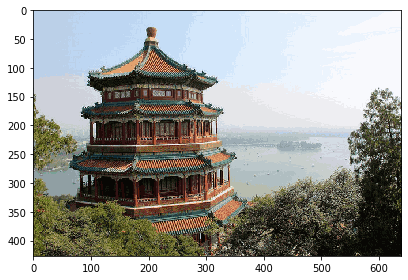

In [152]:
# K-Means Method
img = np.array(img, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w*h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

kmeans = kmeans.cluster_centers_
d = kmeans.shape[1]
img_kmeans = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
  for j in range(h):
    img_kmeans[i][j] = kmeans[labels[label_idx]]
    label_idx += 1
io.imshow(img_kmeans)